File: AmpHGT_PeptideMTR_lg_results.csv
AUROC: 0.9291648917373814, AUPRC: 0.9245562522335555
F1: 0.8776900954358607, MCC: 0.7354442106763468, Accuracy: 0.8675213675213675
File: AmpHGT_PeptideMLM_lg_results.csv
AUROC: 0.9530456576355036, AUPRC: 0.938496577857909
F1: 0.9133611641214759, MCC: 0.8127598100048554, Accuracy: 0.9032634032634033
File: AmpHGT_PeptideMLM-MTR_lg_results.csv
AUROC: 0.9431398882278622, AUPRC: 0.9274123824394631
F1: 0.8950427300733822, MCC: 0.7714657138326743, Accuracy: 0.8807303807303807


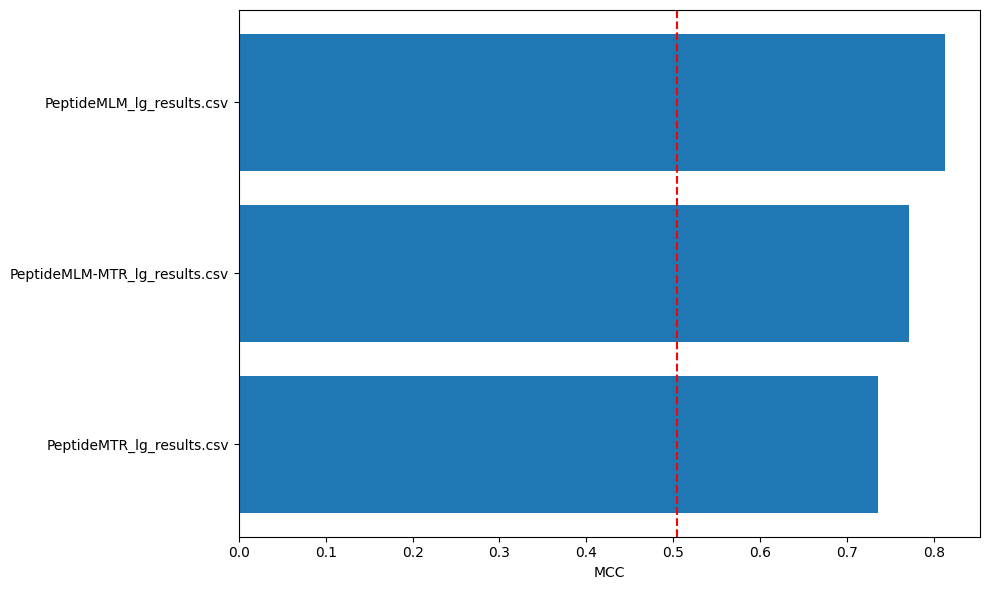

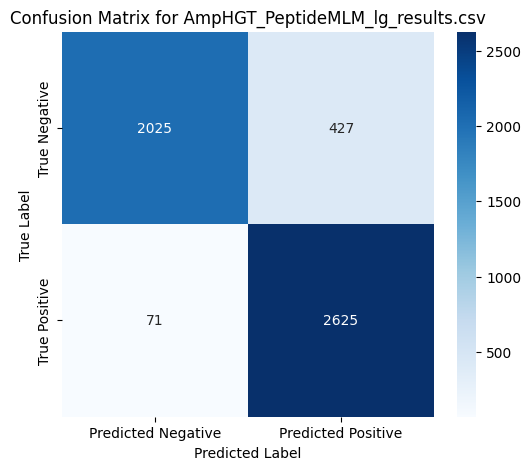

In [16]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
# load files from ../results
import os
import pandas as pd

directory = "../results"

aucs = []
prcs = []
mccs = []

files = [f for f in os.listdir(directory) if "AmpHGT" in f and "lg" in f and f.endswith(".csv")]
for file in files:
    df = pd.read_csv(os.path.join(directory, file))
    
    # calculate auroc and auprc for each dataframe
    y_true = df['true_label']
    y_scores = df['predicted_label']
    auroc = roc_auc_score(y_true, y_scores)
    auprc = average_precision_score(y_true, y_scores)

    # do mcc and accuracy at best threshold
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_threshold = thresholds[np.argmax(f1_scores[:-1])]
    y_pred = (y_scores >= best_threshold).astype(int)
    mcc = matthews_corrcoef(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"File: {file}\nAUROC: {auroc}, AUPRC: {auprc}\nF1: {f1_scores.max()}, MCC: {mcc}, Accuracy: {accuracy}")

    aucs.append(auroc)
    prcs.append(auprc)
    mccs.append(mcc)

average_benchmark = (0.5042 + 0.502 + 0.4911 + 0.524 + 0.5023) / 5

# make barplot of mcc across files
plt.figure(figsize=(10, 6))
# sort by mcc
mccs, files = zip(*sorted(zip(mccs, files)))

# add the benchmark to the plot
plt.axvline(x=average_benchmark, color='r', linestyle='--', label='Benchmark')
plt.barh(range(len(mccs)), mccs, tick_label=[f.replace('AmpHGT_', '') for f in files])
plt.xlabel('MCC')
plt.tight_layout()
plt.show()

# build confusion matrix for the best file processed
best_file = files[np.argmax(mccs)]
df = pd.read_csv(os.path.join(directory, best_file))
y_true = df['true_label']
y_scores = df['predicted_label']
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_threshold = thresholds[np.argmax(f1_scores[:-1])]
y_pred = (y_scores >= best_threshold).astype(int)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {best_file}')
plt.show()

File: CellPPD_PeptideMTR_lg_results.csv
AUROC: 0.9701973333333335, AUPRC: 0.976859286327587
F1: 0.9251887389988643, MCC: 0.8560748313627049, Accuracy: 0.9273333333333333
File: CellPPD_PeptideMLM_lg_results.csv
AUROC: 0.9726488888888889, AUPRC: 0.9777234822808069
F1: 0.9337792592141028, MCC: 0.8680192895318757, Accuracy: 0.934
File: CellPPD_PeptideMLM-MTR_lg_results.csv
AUROC: 0.9725084444444445, AUPRC: 0.9785942349028387
F1: 0.93622794615488, MCC: 0.8751927183435732, Accuracy: 0.9373333333333334


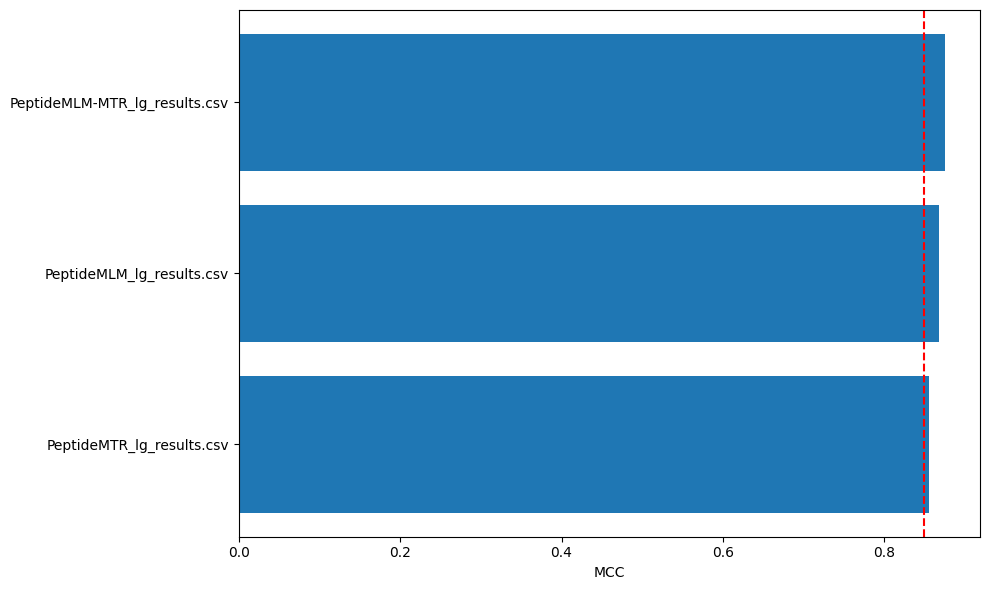

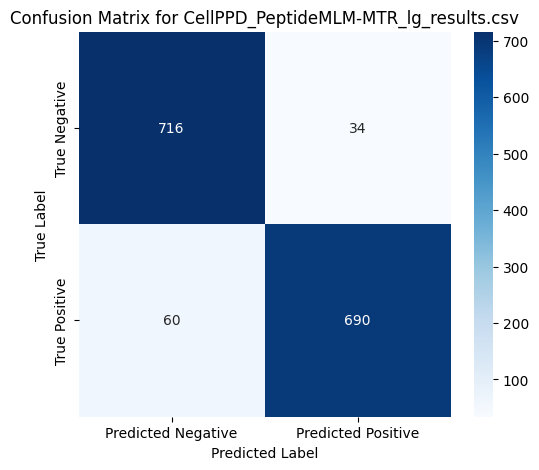

In [17]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
# load files from ../results
import os
import pandas as pd

directory = "../results"


aucs = []
prcs = []
mccs = []

files = [f for f in os.listdir(directory) if "CellPPD" in f and "lg" in f and f.endswith(".csv")]
for file in files:
    df = pd.read_csv(os.path.join(directory, file))

    # calculate auroc and auprc for each dataframe
    y_true = df['true_label']
    y_scores = df['predicted_label']
    auroc = roc_auc_score(y_true, y_scores)
    auprc = average_precision_score(y_true, y_scores)

    # do mcc and accuracy at best threshold
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_threshold = thresholds[np.argmax(f1_scores[:-1])]
    y_pred = (y_scores >= best_threshold).astype(int)
    mcc = matthews_corrcoef(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"File: {file}\nAUROC: {auroc}, AUPRC: {auprc}\nF1: {f1_scores.max()}, MCC: {mcc}, Accuracy: {accuracy}")
    aucs.append(auroc)
    prcs.append(auprc)
    mccs.append(mcc)

# make barplot of mcc across files
plt.figure(figsize=(10, 6))
# sort by mcc
mccs, files = zip(*sorted(zip(mccs, files)))
# add the benchmark to the plot
plt.axvline(x=0.85, color='r', linestyle='--', label='Benchmark')
plt.barh(range(len(mccs)), mccs, tick_label=[f.replace('CellPPD_', '') for f in files])
plt.xlabel('MCC')
plt.tight_layout()
plt.show()

# build confusion matrix for the best file processed
best_file = files[np.argmax(mccs)]
df = pd.read_csv(os.path.join(directory, best_file))
y_true = df['true_label']
y_scores = df['predicted_label']
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_threshold = thresholds[np.argmax(f1_scores[:-1])]
y_pred = (y_scores >= best_threshold).astype(int) 

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {best_file}')
plt.show()

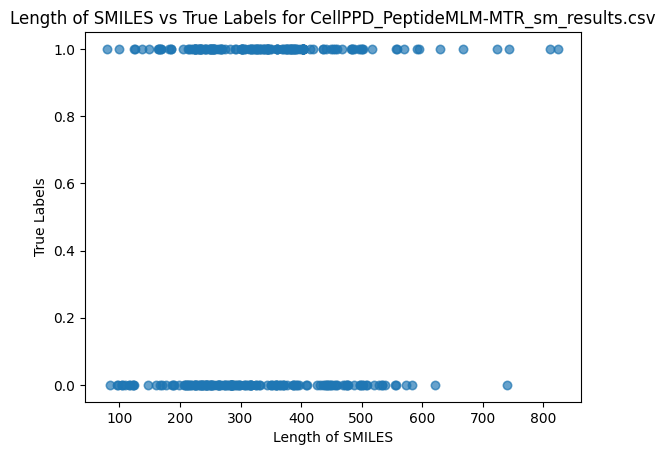

In [15]:

files = os.listdir("../results")

for file in files:
    if "CellPPD" in file and file.endswith(".csv"):
        df = pd.read_csv(os.path.join("../results", file))
        # plot len of 'smiles' vs true_label
        y_true = df['true_label']
        length = df['smiles'].apply(len)
        plt.figure()
        plt.scatter(length, y_true, alpha=0.2)
        plt.xlabel('Length of SMILES')
        plt.ylabel('True Labels')
        plt.title(f'Length of SMILES vs True Labels for {file}')
        plt.show()
        break

File: MHC_PeptideMTR_lg_results.csv
R2: 0.5235504514579108, RMSE: 0.514073112753367
File: MHC_PeptideMLM_lg_results.csv
R2: 0.4460845066273188, RMSE: 0.5976562738945619
File: MHC_PeptideMLM-MTR_lg_results.csv
R2: 0.6589195343424158, RMSE: 0.36801440407802744


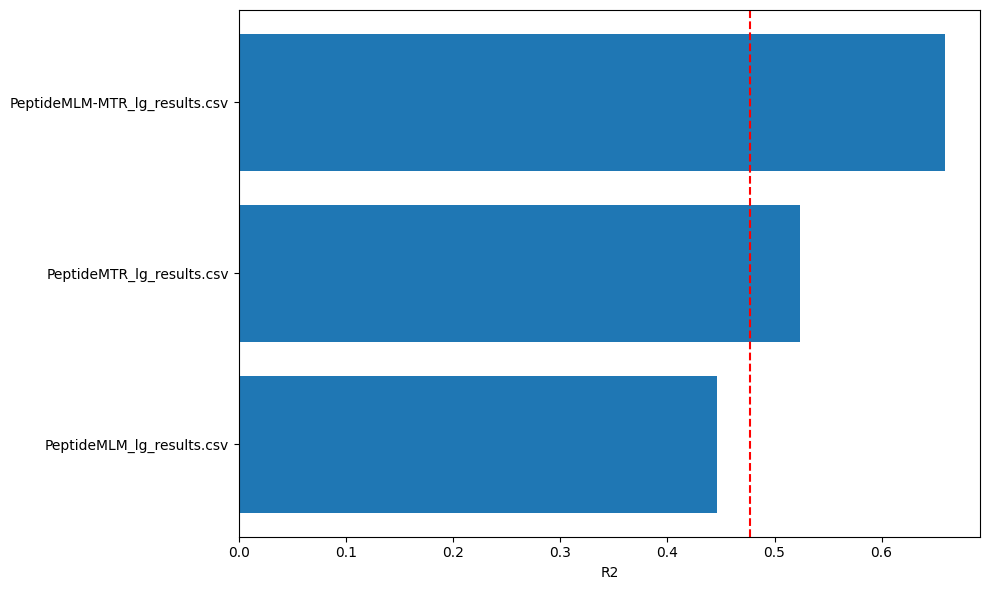

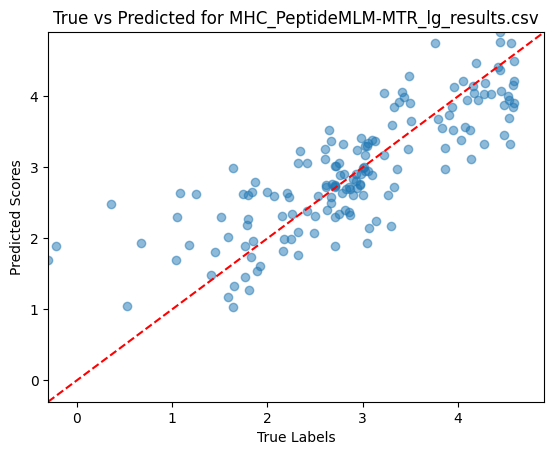

In [21]:
# do it now with MHC

from sklearn.metrics import mean_squared_error, r2_score

directory = "../results2"

r2s = []
rmses = []

files = [f for f in os.listdir(directory) if "MHC" in f and "lg" in f and f.endswith(".csv")]
for file in files:
    df = pd.read_csv(os.path.join(directory, file))

    # calculate auroc and auprc for each dataframe
    y_true = df['true_label']
    # unscale from log10
    y_scores = df['predicted_label']
    # calculate r2 and rmse
    r2 = r2_score(y_true, y_scores)
    rmse = mean_squared_error(y_true, y_scores)
    print(f"File: {file}\nR2: {r2}, RMSE: {rmse}")
    r2s.append(r2)
    rmses.append(rmse)


# plot all r2 in barplot
plt.figure(figsize=(10, 6))
# sort by r2
r2s, files = zip(*sorted(zip(r2s, files)))
plt.barh(range(len(r2s)), r2s, tick_label=[f.replace('MHC_', '') for f in files])
# add the benchmark to the plot
plt.axvline(x=0.477, color='r', linestyle='--', label='Benchmark')
plt.xlabel('R2')
plt.tight_layout()
plt.show()

# build scatter plot for the best file processed
best_file = files[np.argmax(r2s)]
df = pd.read_csv(os.path.join("../results2", best_file))
y_true = df['true_label']
y_scores = df['predicted_label']
plt.figure()
plt.scatter(y_true, y_scores, alpha=0.5)
plt.xlabel('True Labels')
plt.ylabel('Predicted Scores')
plt.title(f'True vs Predicted for {best_file}')
# set min and max to be the same
min_val = min(y_true.min(), y_scores.min())
max_val = max(y_true.max(), y_scores.max())
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
# plot y=x line
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()


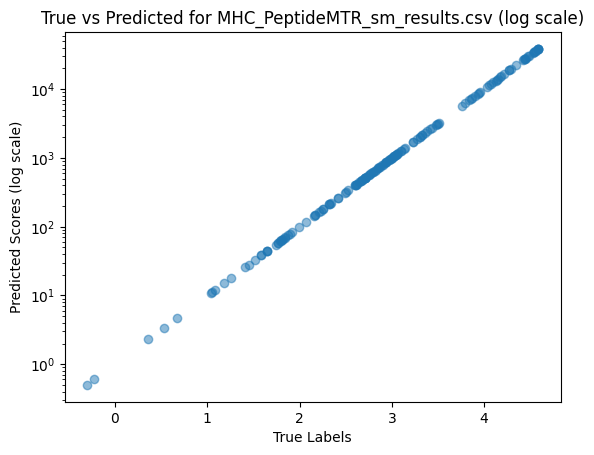

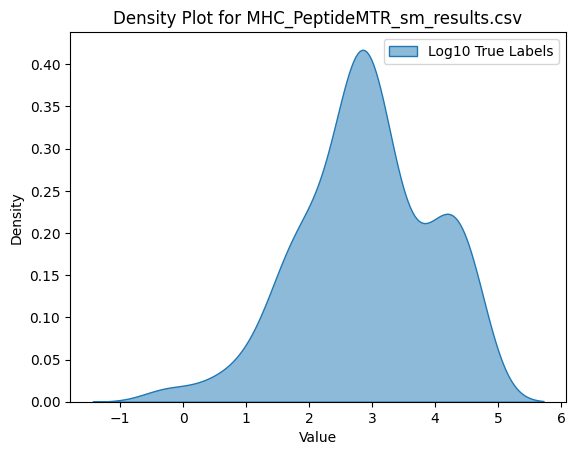

In [10]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# plot true vs true with log transformed on y axis
files = os.listdir("../results")
for file in files:
    if "MHC" in file and file.endswith(".csv"):
        df = pd.read_csv(os.path.join("../results", file))
        y_true = df['true_label']
        y_true_log = df['true_label'].apply(lambda x: np.log10(x + 1e-8))

        import matplotlib.pyplot as plt
        plt.figure()
        plt.scatter(y_true_log, y_true, alpha=0.5)
        plt.yscale('log')
        plt.xlabel('True Labels')
        plt.ylabel('Predicted Scores (log scale)')
        plt.title(f'True vs Predicted for {file} (log scale)')
        plt.show()

        # plot density plot of y_true vs y_true_log
        import seaborn as sns
        plt.figure()
        # sns.kdeplot(y_true, label='True Labels', fill=True, alpha=0.5)
        sns.kdeplot(y_true_log, label='Log10 True Labels', fill=True, alpha=0.5)
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Density Plot for {file}')
        plt.legend()
        plt.show()
        break
        

In [52]:
# load ../data/MHC_train_original.csv and convert Quantitative Measurement to log scale and resave column 'label' as MHC_train.csv

import pandas as pd
df = pd.read_csv("../data/MHC_train_original.csv")
df['label'] = df['Quantitative Measurement'].apply(lambda x: np.log10(x + 1e-8))
df.to_csv("../data/MHC_train.csv", index=False)

File: THPep_PeptideMTR_lg_results.csv
AUROC: 0.9343113583875707, AUPRC: 0.8581498215171195
F1: 0.7765957397012223, MCC: 0.6803158055724269, Accuracy: 0.8620689655172413
File: THPep_PeptideMLM_lg_results.csv
AUROC: 0.932264329204283, AUPRC: 0.8089197011239275
F1: 0.8118279520036998, MCC: 0.7316189605763215, Accuracy: 0.8850574712643678
File: THPep_PeptideMLM-MTR_lg_results.csv
AUROC: 0.9394945412555112, AUPRC: 0.8628299623499016
F1: 0.78802992026169, MCC: 0.6977953195657794, Accuracy: 0.8604269293924466


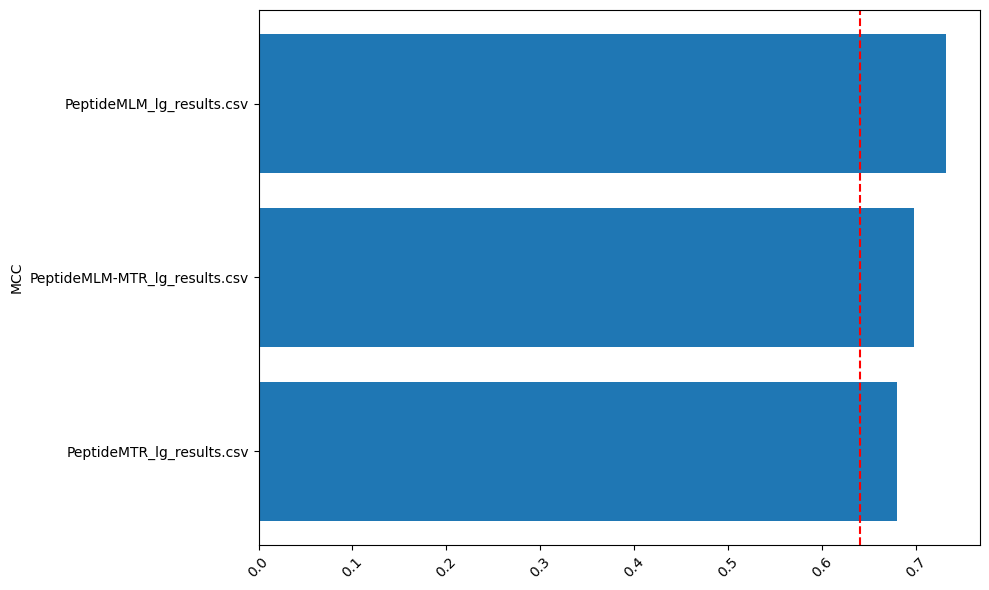

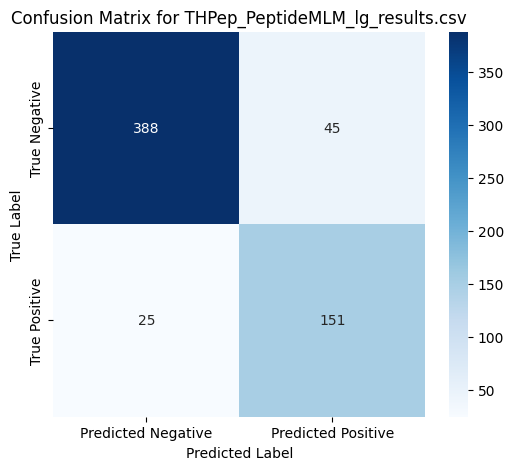

In [19]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
# load files from ../results
import os
import pandas as pd

files = [f for f in os.listdir("../results") if "THPep" in f and "lg" in f and f.endswith(".csv")]

aucs = []
prcs = []
mccs = []

for file in files:
    df = pd.read_csv(os.path.join("../results", file))

    # calculate auroc and auprc for each dataframe
    y_true = df['true_label']
    y_scores = df['predicted_label']
    auroc = roc_auc_score(y_true, y_scores)
    auprc = average_precision_score(y_true, y_scores)

    # do mcc and accuracy at best threshold
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_threshold = thresholds[np.argmax(f1_scores[:-1])]
    y_pred = (y_scores >= best_threshold).astype(int)
    mcc = matthews_corrcoef(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"File: {file}\nAUROC: {auroc}, AUPRC: {auprc}\nF1: {f1_scores.max()}, MCC: {mcc}, Accuracy: {accuracy}")

    aucs.append(auroc)
    prcs.append(auprc)
    mccs.append(mcc)


# make barplot of mcc across files
plt.figure(figsize=(10, 6))
# sort by mcc
mccs, files = zip(*sorted(zip(mccs, files)))
plt.barh(range(len(mccs)), mccs, tick_label=[f.replace('THPep_', '') for f in files])
# add the benchmark to the plot
benchmark_score = (0.64)

plt.axvline(x=benchmark_score, color='r', linestyle='--', label='Benchmark')
plt.ylabel('MCC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# build confusion matrix for the best file processed
best_file = files[np.argmax(mccs)]
df = pd.read_csv(os.path.join("../results", best_file))
y_true = df['true_label']
y_scores = df['predicted_label']
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_threshold = thresholds[np.argmax(f1_scores[:-1])]
y_pred = (y_scores >= best_threshold).astype(int)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {best_file}')
plt.show()

In [1]:
from datasets import load_dataset
ds = load_dataset("nvidia/esm2_uniref_pretraining_data", split="train", streaming=True)
print(next(iter(ds)))

/data/aaron/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'ur50_id': 'UniRef50_A0A081XN86', 'ur90_id': 'UniRef90_UPI002FBE17D9', 'sequence': 'MSPRRTGGARPPGPCTPCGPRPRCPSRRSAAARPAPSAAPARRARPGRRPGCRPGTDCPGTARRPGGGPAGLRRPDAGRPGRAARPARPPAPRRPTRLAPDRLTPAGRADDQAARDRAESLADALPLPANAVHPRYSAGSFDHRYDAPARTDLPSDGGWHTVTICEIPVSLRTEYICVPSVDPAVFATLLLANDSDQALLAGPLEVTVDGDFLLGTALRTLAPGATRRVGLGVAESVRATRRTEVQESTAGLRGGITVVEQRVHVELANRLGHAVTVEVRERIPVLGDKDIRIEDRPGSPAWTAPAEPSEAYPAGTRLWRVELPAGGRAQLEGGYEIRIPAGKALAGGNRRN'}


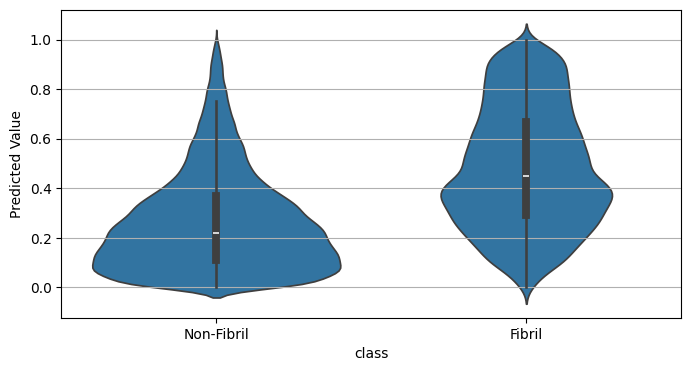

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file_name = "combined_fibrillation_results.csv"

results_df = pd.read_csv(file_name)

# if column 'mean_prediction' exists, use it as prediction
if 'mean_prediction' in results_df.columns:
    results_df['predicted_value'] = results_df['mean_prediction']
if 'prediction' in results_df.columns:
    results_df['predicted_value'] = results_df['prediction']

# apply logistic transformation to predicted_value
results_df['predicted_value'] = 1 / (1 + np.exp(-results_df['predicted_value']))

plt.figure(figsize=(8, 4))

plotting_df = results_df.copy()
plotting_df['class'] = plotting_df['value'].apply(lambda x: 'Fibril' if x >= 0.5 else 'Non-Fibril')
sns.violinplot(x='class', y='predicted_value', data=plotting_df, fill='source_file')

plt.ylabel('Predicted Value')

# add horizontal grid behind violins
plt.grid(axis='y')

plt.show()
# plt.savefig(f'violin_{model_size_list[i]}_model.png', dpi=300, bbox_inches='tight')


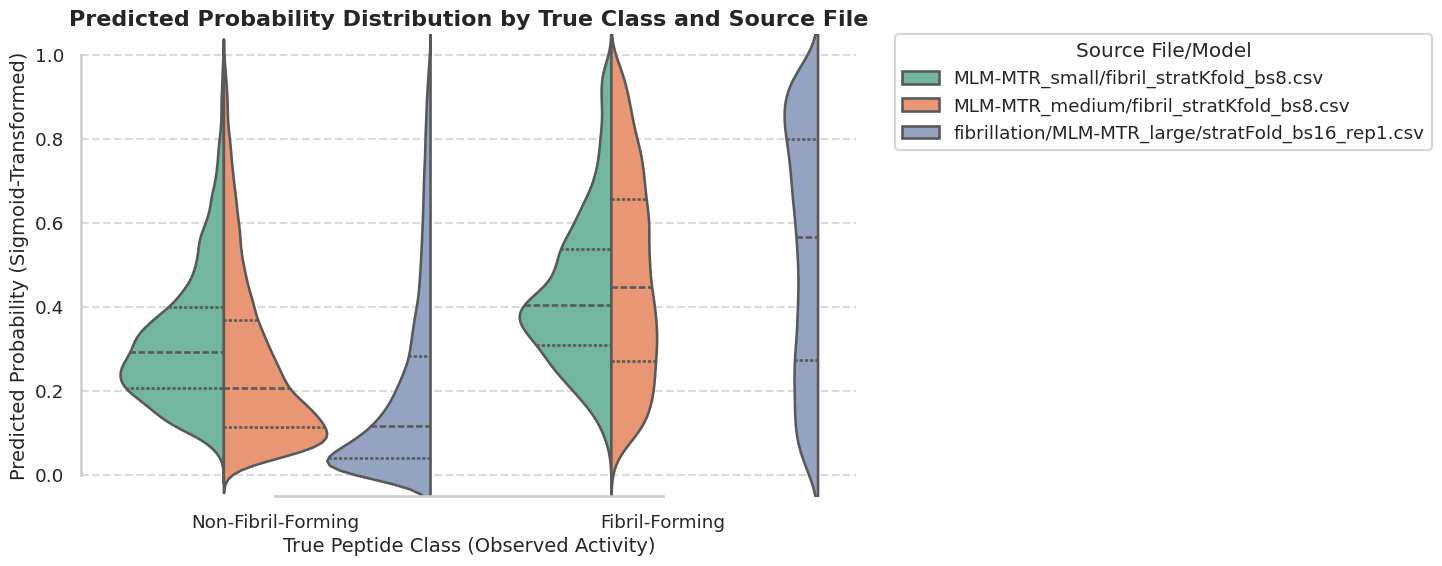

Plot generated and saved as fibrillation_prediction_violin.png


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- Configuration ---
file_name = "combined_fibrillation_results.csv"
output_figure_name = "fibrillation_prediction_violin.png"

# --- 1. Load Data and Standardize Columns ---
results_df = pd.read_csv(file_name)

# Identify the prediction column, prioritizing 'mean_prediction'
if 'mean_prediction' in results_df.columns:
    results_df['predicted_value'] = results_df['mean_prediction']
elif 'prediction' in results_df.columns:
    results_df['predicted_value'] = results_df['prediction']
else:
    print("Error: No 'mean_prediction' or 'prediction' column found.")
    raise KeyError("Missing required prediction column.")

# --- 2. Apply Logistic (Sigmoid) Transformation ---
# This converts logit (unbounded) output to a probability (0 to 1)
results_df['predicted_value'] = 1 / (1 + np.exp(-results_df['predicted_value']))

# --- 3. Prepare Data for Plotting ---
plotting_df = results_df.copy()
# Create the categorical True Class label
plotting_df['True Class'] = plotting_df['value'].apply(lambda x: 'Fibril-Forming' if x >= 0.5 else 'Non-Fibril-Forming')

# --- 4. Plotting (Aesthetics & Clarity) ---

# Set a professional style (e.g., 'whitegrid' for computational data) and context
sns.set_theme(style="whitegrid", context="talk", font_scale=0.8)

# Create the figure with a better size for a publication/presentation
plt.figure(figsize=(10, 6)) 

# Create the Violin Plot
# - hue='source_file' (assuming this compares different models/data splits)
# - split=True makes for cleaner comparison when only two 'True Class' categories exist
# - inner='quartile' shows the median and quartiles clearly inside the violin
ax = sns.violinplot(
    x='True Class', 
    y='predicted_value', 
    data=plotting_df, 
    hue='source_file', # Use 'hue' for categorical comparison by file
    split=True, 
    inner='quartile', # Show distribution shape and key statistical points
    palette='Set2'    # Use a visually pleasing color palette
)

# --- 5. Customizing Labels and Title ---
plt.title(
    'Predicted Probability Distribution by True Class and Source File', 
    fontsize=16, 
    fontweight='bold'
)
plt.xlabel('True Peptide Class (Observed Activity)', fontsize=14)
plt.ylabel('Predicted Probability (Sigmoid-Transformed)', fontsize=14)

# Adjust y-axis limits to clearly show the 0-1 probability range
plt.ylim(-0.05, 1.05) 

# Move legend outside the plot area for better data visibility
plt.legend(title='Source File/Model', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Remove the top and right spines for a cleaner look
sns.despine(trim=True)

# Add horizontal grid lines (seaborn default often includes this, but it's explicit here)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --- 6. Save and Show ---
# Save the high-quality figure for papers/presentations
plt.savefig(output_figure_name, dpi=300, bbox_inches='tight')

plt.show()

print(f"Plot generated and saved as {output_figure_name}")

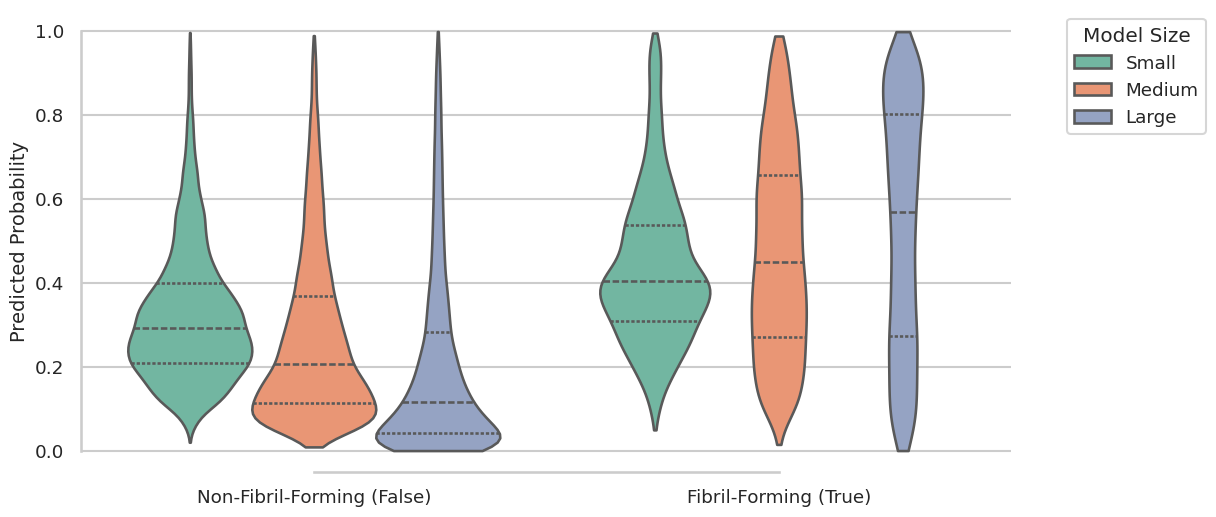

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file_name = "combined_fibrillation_results.csv"

# --- 1. Load Data and Standardize Columns ---
results_df = pd.read_csv(file_name) 

# for source_file column, split 0 on '/' and split -1 on '_'
results_df['source_file'] = results_df['source_file'].apply(lambda x: x.split('/')[0].split('_')[-1])
# replace 'fibrillation' with 'large'
results_df['source_file'] = results_df['source_file'].str.replace('fibrillation', 'large')
# capitalize first letter
results_df['source_file'] = results_df['source_file'].str.capitalize()


# Identify the prediction column
if 'mean_prediction' in results_df.columns:
    results_df['predicted_value'] = results_df['mean_prediction']
elif 'prediction' in results_df.columns:
    results_df['predicted_value'] = results_df['prediction']
else:
    raise KeyError("Missing required prediction column.")

# Apply logistic transformation (Sigmoid)
results_df['predicted_value'] = 1 / (1 + np.exp(-results_df['predicted_value']))

# --- 2. Prepare Data for Plotting ---
plotting_df = results_df.copy()

# Create the categorical True Class label
plotting_df['True Class'] = plotting_df['value'].apply(lambda x: 'Non-Fibril-Forming (False)' if x < 0.5 else 'Fibril-Forming (True)')
plotting_df = plotting_df.rename(columns={'source_file': 'Source File'})

# --- 3. Plotting (Correct Structure and Aesthetics) ---

# Set a professional style and context
sns.set_theme(style="whitegrid", context="talk", font_scale=0.8)

# Use a wider figure to accommodate 6 violins clearly
plt.figure(figsize=(12, 6)) 

# --- CRITICAL CHANGE: Separate by Class (x) and group by File (hue) ---
# This generates 2 groups on the X-axis, with 3 violins in each group.
ax = sns.violinplot(
    x='True Class', 
    y='predicted_value', 
    data=plotting_df, 
    hue='Source File', 
    split=False,            # Ensures 3 separate violins per True/False class
    inner='quartile',       
    palette='Set2',          # Use a strong categorical palette
    # cut ends off
    cut=0
)

# --- Customizing Labels and Title ---
plt.title('')

plt.xlabel('', fontsize=14)
plt.ylabel('Predicted Probability', fontsize=14)

# Adjust y-axis limits to clearly show the 0-1 probability range
plt.ylim(-0.05, 1.05) 

# Move legend outside the plot area
plt.legend(title='Model Size', loc='upper left', bbox_to_anchor=(1.05, 1))

# Remove the top and right spines
sns.despine(trim=True)

# Save the high-quality figure
output_figure_name = "violin_models_side_by_side.png"
# plt.savefig(output_figure_name, dpi=300, bbox_inches='tight')

plt.show() # Uncomment this on your local machine

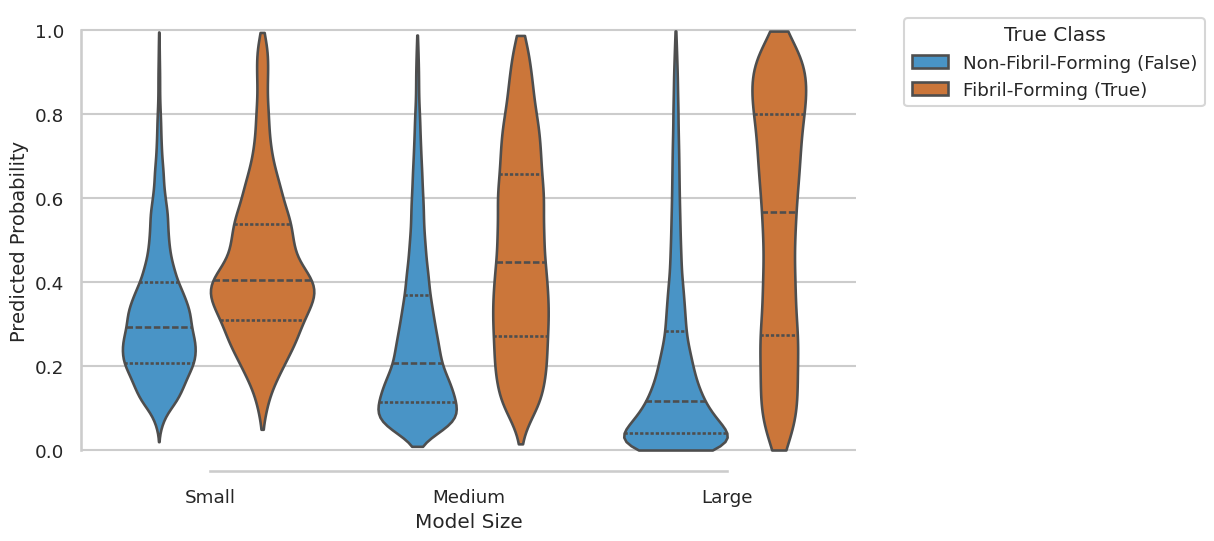

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file_name = "combined_fibrillation_results.csv"

# --- 1. Load Data and Standardize Columns ---
results_df = pd.read_csv(file_name) 

# Process source_file column to extract model size/name
results_df['source_file'] = results_df['source_file'].apply(lambda x: x.split('/')[0].split('_')[-1])
results_df['source_file'] = results_df['source_file'].str.replace('fibrillation', 'large')
results_df['source_file'] = results_df['source_file'].str.capitalize()

# Identify the prediction column
if 'mean_prediction' in results_df.columns:
    results_df['predicted_value'] = results_df['mean_prediction']
elif 'prediction' in results_df.columns:
    results_df['predicted_value'] = results_df['prediction']
else:
    raise KeyError("Missing required prediction column.")

# Apply logistic transformation (Sigmoid)
results_df['predicted_value'] = 1 / (1 + np.exp(-results_df['predicted_value']))

# --- 2. Prepare Data for Plotting ---
plotting_df = results_df.copy()

# Create the categorical True Class label
plotting_df['True Class'] = plotting_df['value'].apply(lambda x: 'Non-Fibril-Forming (False)' if x < 0.5 else 'Fibril-Forming (True)')
plotting_df = plotting_df.rename(columns={'source_file': 'Model Size'})

# --- 3. Plotting (Compact Split Violins) ---

# Set a professional style
sns.set_theme(style="whitegrid", context="talk", font_scale=0.8)

plt.figure(figsize=(10, 6)) 

# --- CRITICAL CONFIGURATION ---
# x='Model Size': Gives three groups on the X-axis.
# hue='True Class': Colors/splits each of those three groups.
# split=True: Merges the two hue groups into a single, symmetrical violin for compaction.
ax = sns.violinplot(
    data=plotting_df, 
    x='Model Size', 
    y='predicted_value', 
    hue='True Class', 
    split=False,            # Keeps the two classes separate within each model size
    inner='quartile', 
    palette={'Fibril-Forming (True)': '#E37222', 'Non-Fibril-Forming (False)': '#3498DB'},
    cut=0
)

# --- Customizing Labels and Title ---
plt.ylabel('Predicted Probability', fontsize=14)

# Adjust y-axis limits to clearly show the 0-1 probability range
plt.ylim(-0.05, 1.05) 

# Move legend outside the plot area
plt.legend(title='True Class', loc='upper left', bbox_to_anchor=(1.05, 1))

# Remove the top and right spines
sns.despine(trim=True)

# Save the high-quality figure
output_figure_name = "violin_models_split_by_class.png"
# plt.savefig(output_figure_name, dpi=300, bbox_inches='tight')
plt.show() # Uncomment this on your local machine

/data/aaron/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 8 x 4 in image.
/data/aaron/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: plotnine_violin_models_separate.png


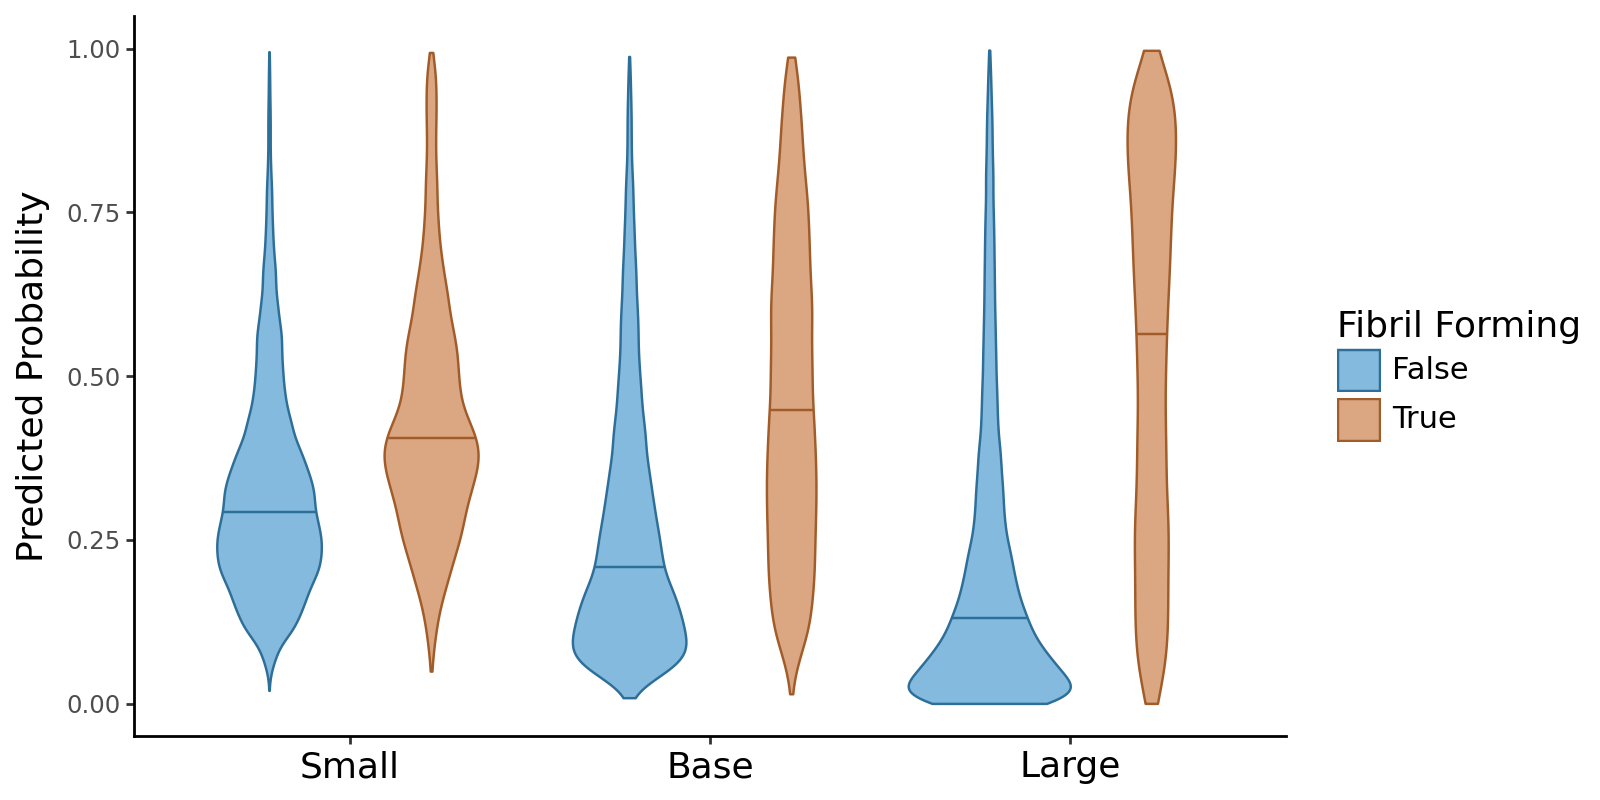

In [85]:
import pandas as pd
import numpy as np
# Import the necessary plotnine components
from plotnine import (
    ggplot,
    aes,
    geom_violin,
    geom_boxplot,
    labs,
    theme_classic,
    theme_light,
    scale_y_continuous,
    scale_fill_manual,
    scale_color_manual,
    theme,
    element_text,
    position_dodge
)

# --- Configuration ---
file_name = "combined_fibrillation_results.csv"
output_figure_name = "plotnine_violin_models_separate.png"

# Define the custom color palette
COLOR_PALETTE = {
    'True': "#A25C29", 
    'False': "#2E6F9A"
}

FILL_PALETTE = {
    'True': "#DBA782", 
    'False': "#83BADE"
}


# --- 1. Data Loading and Transformation (Standard Python) ---
results_df = pd.read_csv(file_name) 

# Process source_file column to extract model size/name
results_df['source_file'] = results_df['source_file'].apply(lambda x: x.split('/')[0].split('_')[-1])
results_df['source_file'] = results_df['source_file'].str.replace('fibrillation', 'large')
results_df['source_file'] = results_df['source_file'].str.replace('medium', 'base')
results_df['source_file'] = results_df['source_file'].str.capitalize()

# sort source_file by small, base, large
model_size_order = ['Small', 'Base', 'Large']
results_df['source_file'] = pd.Categorical(results_df['source_file'], categories=model_size_order, ordered=True)

# Identify the prediction column and apply Sigmoid
if 'mean_prediction' in results_df.columns:
    results_df['predicted_value'] = results_df['mean_prediction']
elif 'prediction' in results_df.columns:
    results_df['predicted_value'] = results_df['prediction']
else:
    raise KeyError("Missing required prediction column.")

results_df['predicted_value'] = 1 / (1 + np.exp(-results_df['predicted_value']))

# --- 2. Prepare Data for Plotting ---
plotting_df = results_df.copy()
plotting_df['Fibril Forming'] = plotting_df['value'].apply(lambda x: 'False' if x < 0.5 else 'True')
plotting_df = plotting_df.rename(columns={'source_file': 'Model Size'})

# --- 3. Plotting with plotnine (Grammar of Graphics) ---

p = (
    # Define the data and core aesthetics (mapping columns to visual properties)
    ggplot(plotting_df, aes(x='Model Size', y='predicted_value', fill='Fibril Forming', color='Fibril Forming'))
    
    # 1. Add Violin Geometry
    # position=position_dodge ensures the violins are side-by-side (like split=False in seaborn)
    # draw_quantiles=[0.5] adds the median line (similar to inner='quartile')
    + geom_violin(
        position=position_dodge(width=0.9), 
        trim=True,                 # Ensures the distribution extends to the min/max values (like cut=0)
        draw_quantiles=[0.5]
    )
    # + geom_boxplot(
    #     position=position_dodge(width=0.8),
    #     outlier_size=0,
    #     width=0.6,
    #     outlier_alpha=0.1
    #     # add outlier point size
    # )
    
    # 2. Custom Colors
    + scale_fill_manual(values=FILL_PALETTE)
    + scale_color_manual(values=COLOR_PALETTE)
    
    # 3. Y-axis and Limits
    + scale_y_continuous(
        name="Predicted Probability",
        limits=(0, 1)
    )
    
    # 4. Labels and Title
    + labs(
        fill="Fibril Forming" # Sets the legend title
    )
    
    # 5. Theme and Aesthetics
    + theme_classic() # Use a clean background theme
    + theme(
        plot_title=element_text(hjust=0.5, size=14, weight='bold'),
        legend_position='right',
        panel_grid_major_x=element_text(color="white"),

        axis_title_y=element_text(size=13),

        axis_title_x=element_text(text=''),
        axis_text_x=element_text(size=13, color="black"),

        # make legend title larger
        legend_title=element_text(size=13),
        # make legend text larger
        legend_text=element_text(size=11),

        # add horizontal gridlines
        # panel_grid_major_y=element_text(color="lightgray")

        # plot size
        figure_size=(8, 4),
    )
)

# remove right and top spines

# --- 4. Save Plot ---
p.save(output_figure_name, width=8, height=4, dpi=300)

# Optional: To display the plot in a Jupyter/IPython environment, uncomment the line below.
p

['Small' 'Base' 'Large' 'Morgan FP']


/data/aaron/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 8 x 4 in image.
/data/aaron/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: plotnine_violin_models_separate_auroc.png


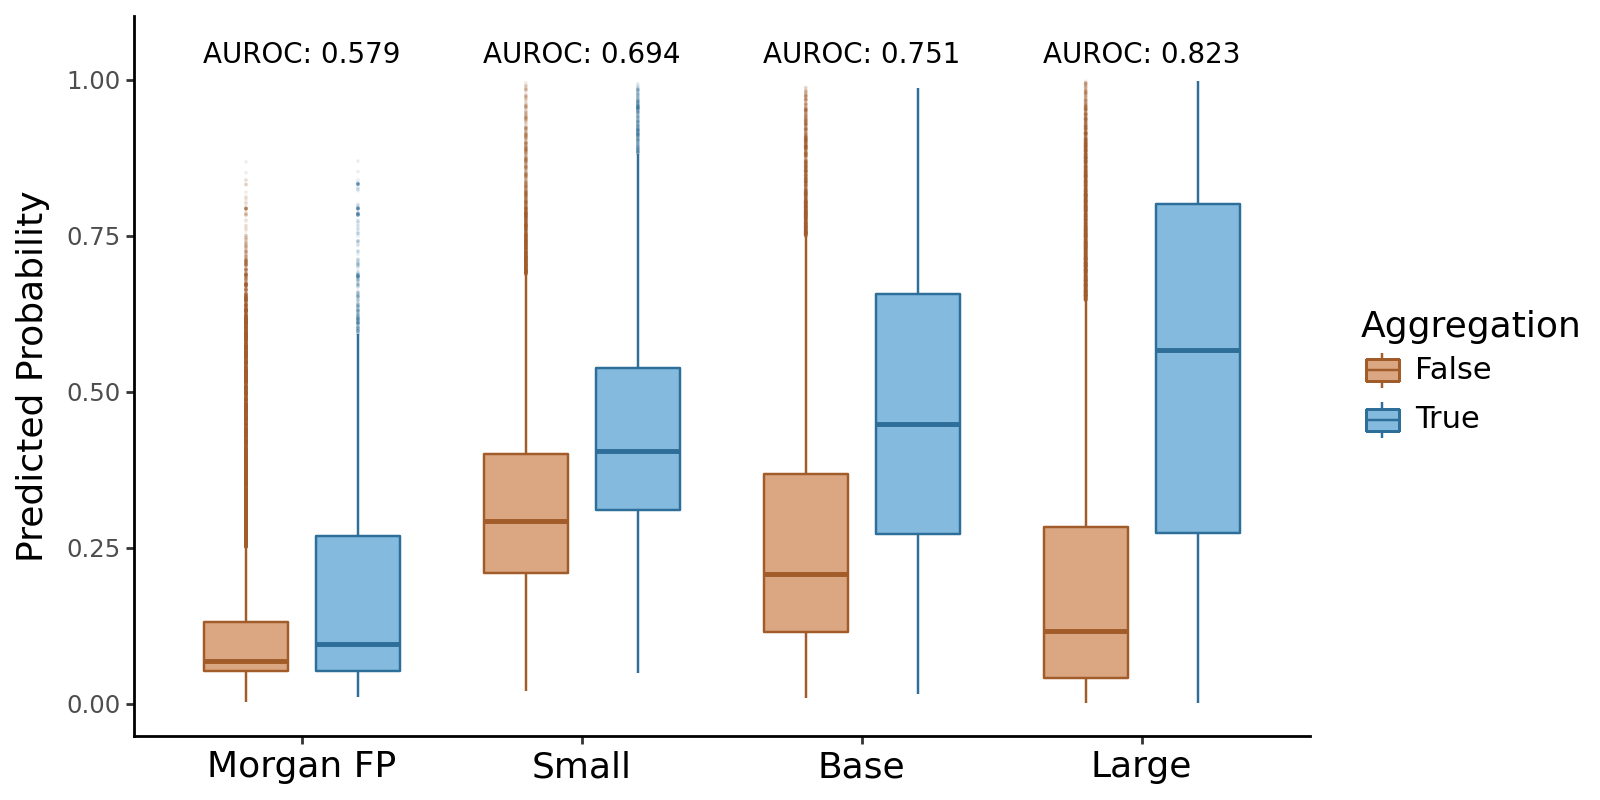

In [116]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score # <-- New: Required for AUROC calculation
from plotnine import (
    ggplot,
    aes,
    geom_violin,
    geom_boxplot,
    geom_text,          # <-- New: Required for adding text annotations
    labs,
    theme_classic,
    scale_y_continuous,
    scale_fill_manual,
    scale_color_manual,
    theme,
    element_text,
    position_dodge
)

# --- Configuration ---
file_name = "combined_fibrillation_results.csv"
output_figure_name = "plotnine_violin_models_separate_auroc.png" # Changed name for clarity

# Define the custom color palette
COLOR_PALETTE = {
    'False': "#A25C29",
    'True': "#2E6F9A"
}

FILL_PALETTE = {
    'False': "#DBA782", 
    'True': "#83BADE"
}

# --- 1. Data Loading and Transformation (Standard Python) ---
results_df = pd.read_csv(file_name) 

# columns are value,predicted_value,pH,fold
mfp = pd.read_csv('mfp_fibrillation.csv')
# add source_file column to MFP
mfp['source_file'] = 'Morgan FP'
mfp['predicted_value'] = mfp['prediction']

# append mfp to results_df
results_df = pd.concat([results_df, mfp], ignore_index=True)

# Process source_file column to extract model size/name
results_df['source_file'] = results_df['source_file'].apply(lambda x: x.split('/')[0].split('_')[-1])
results_df['source_file'] = results_df['source_file'].str.replace('fibrillation', 'large')
results_df['source_file'] = results_df['source_file'].str.replace('medium', 'base')
results_df['source_file'] = results_df['source_file'].str.capitalize()
# replace Morgan fp with 'Morgan FP'
results_df['source_file'] = results_df['source_file'].replace('Morgan fp', 'Morgan FP')


print(results_df['source_file'].unique())
# Sort source_file by small, base, large
model_size_order = ['Morgan FP', 'Small', 'Base', 'Large']
results_df['source_file'] = pd.Categorical(results_df['source_file'], categories=model_size_order, ordered=True)

# Identify the prediction column and apply Sigmoid
if 'mean_prediction' in results_df.columns:
    results_df['predicted_value'] = results_df['mean_prediction']
elif 'prediction' in results_df.columns:
    results_df['predicted_value'] = results_df['prediction']
else:
    raise KeyError("Missing required prediction column.")

results_df['predicted_value'] = 1 / (1 + np.exp(-results_df['predicted_value']))

# --- 2. Prepare Data for Plotting ---
plotting_df = results_df.copy()
# Note: 'value' (0/1) will be used for AUROC calculation
plotting_df['Fibril Forming'] = plotting_df['value'].apply(lambda x: 'False' if x < 0.5 else 'True')
plotting_df = plotting_df.rename(columns={'source_file': 'Model Size'})

# --- 3. Calculate AUROC for Annotation ---
auroc_data = []
for model_size in model_size_order:
    subset = results_df[results_df['source_file'] == model_size]
    
    if not subset.empty and len(subset['value'].unique()) > 1:
        # Calculate AUROC using true binary labels and predicted probabilities
        auroc = roc_auc_score(subset['value'], subset['predicted_value'])
        auroc_label = f"AUROC: {auroc:.3f}"
    else:
        auroc_label = "N/A"
        
    auroc_data.append({
        'Model Size': model_size, 
        'AUROC_Label': auroc_label
    })

# Create a separate DataFrame for annotations
auroc_df = pd.DataFrame(auroc_data)
auroc_df['Model Size'] = pd.Categorical(auroc_df['Model Size'], categories=model_size_order, ordered=True)
# Set the y-coordinate for the annotation (just below the top limit 1.0)
auroc_df['Y_Coord'] = 1.04


# --- 4. Plotting with plotnine (Grammar of Graphics) ---

p = (
    ggplot(plotting_df, aes(x='Model Size', y='predicted_value', fill='Fibril Forming', color='Fibril Forming'))
    
    # 1. Add Violin Geometry
    # + geom_violin(
    #     position=position_dodge(width=0.9), 
    #     trim=True,                 
    #     draw_quantiles=[0.5]
    # )
    
    # 1.5 Add Boxplot Geometry (Optional)
    + geom_boxplot(
        position=position_dodge(width=0.8),
        outlier_size=0,
        width=0.6,
        outlier_alpha=0.1,
        outlier_shape='.'
        # coef = 100
    )

    # 2. Add AUROC Annotation Layer <-- NEW
    + geom_text(
        aes(x='Model Size', y='Y_Coord', label='AUROC_Label'),
        data=auroc_df,
        inherit_aes=False, # Ensure the text layer ignores the fill/color aesthetics
        size=10, # Size in plotnine units (around 8pt)
        color='black'
    )
    
    # 3. Custom Colors
    + scale_fill_manual(values=FILL_PALETTE)
    + scale_color_manual(values=COLOR_PALETTE)
    
    # 4. Y-axis and Limits
    + scale_y_continuous(
        name="Predicted Probability",
        limits=(0, 1.05) # Increased limit slightly to fit the AUROC text
    )
    
    # 5. Labels and Title
    + labs(
        fill="Fibril Forming" 
    )
    
    # 6. Theme and Aesthetics
    + theme_classic()
    + theme(
        plot_title=element_text(hjust=0.5, size=14, weight='bold'),
        legend_position='right',
        axis_title_y=element_text(size=13),
        axis_title_x=element_text(text=''),
        axis_text_x=element_text(size=13, color="black"),
        legend_title=element_text(text='Aggregation', size=13),
        legend_text=element_text(size=11),
        figure_size=(8, 4),
    )
)

# --- 5. Save Plot ---
p.save(output_figure_name, width=8, height=4, dpi=300)

p